<a target="_blank" href="https://colab.research.google.com/github/lm2612/Tutorials/blob/main/1_supervised_learning_regression/1-AdvancedLinearRegression_HousePrice.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# House price prediction: Advanced, code your own


In this exercise, we are going to code up our own linear regression model using 1.) least squares and 2.) gradient descent. We will apply to house price prediction using a subset of the [California house price dataset](https://www.kaggle.com/camnugent/california-housing-prices). Our dataset contains 200 observations for housing blocks in California obtained from the 1990 census. The dataset contains columns:

1. `longitude`: A measure of how far west a house is; a higher value is farther west

2. `latitude`: A measure of how far north a house is; a higher value is farther north

3. `housing_median_age`: Median age of a house within a block; a lower number is a newer building

4. `total_rooms`: Total number of rooms within a block

5. `total_bedrooms`: Total number of bedrooms within a block

6. `population`: Total number of people residing within a block

7. `households`: Total number of households, a group of people residing within a home unit, for a block

8. `median_income`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. `median_house_value`: Median house value for households within a block (measured in US Dollars)

10. `ocean_proximity`: Location of the house w.r.t ocean/sea

In this example, we are going to create a regression model to predict `median_house_value` using only `median_income`.

Load the  file `housing_short.csv` in the github repo.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    filepath = "https://raw.githubusercontent.com/lm2612/Tutorials/refs/heads/main/1_supervised_learning_regression/housing_short.csv"
    print(f"Notebook running in google colab. Using raw github filepath = {filepath}")

else:
    filepath = "./housing_short.csv"
    print(f"Notebook running locally. Using local filepath = {filepath}")


Notebook running in google colab. Using raw github filepath = https://raw.githubusercontent.com/lm2612/Tutorials/refs/heads/main/1_supervised_learning_regression/housing_short.csv


In [15]:
df = pd.read_csv(filepath)
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [17]:
# Gives you information on whole dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           200 non-null    float64
 1   latitude            200 non-null    float64
 2   housing_median_age  200 non-null    int64  
 3   total_rooms         200 non-null    int64  
 4   total_bedrooms      200 non-null    int64  
 5   population          200 non-null    int64  
 6   households          200 non-null    int64  
 7   median_income       200 non-null    float64
 8   median_house_value  200 non-null    int64  
 9   ocean_proximity     200 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 15.8+ KB


In [18]:
# Checking for missing values

#Counts number of missing values per column
df.isna().sum()

# Calculates the percentage missing
df.isna().mean()



,0
longitude,0.0
latitude,0.0
housing_median_age,0.0
total_rooms,0.0
total_bedrooms,0.0
population,0.0
households,0.0
median_income,0.0
median_house_value,0.0
ocean_proximity,0.0


Our goal is to predict `median_house_value`. This will be our dependent variable, $y$. Pick another variable that you think will be a useful predictor of house value, that we will use as our dependent variable, $x$. First, we should check if these variables appear correlated by plotting them.

Does your choice of variable seem suitable for linear regression?

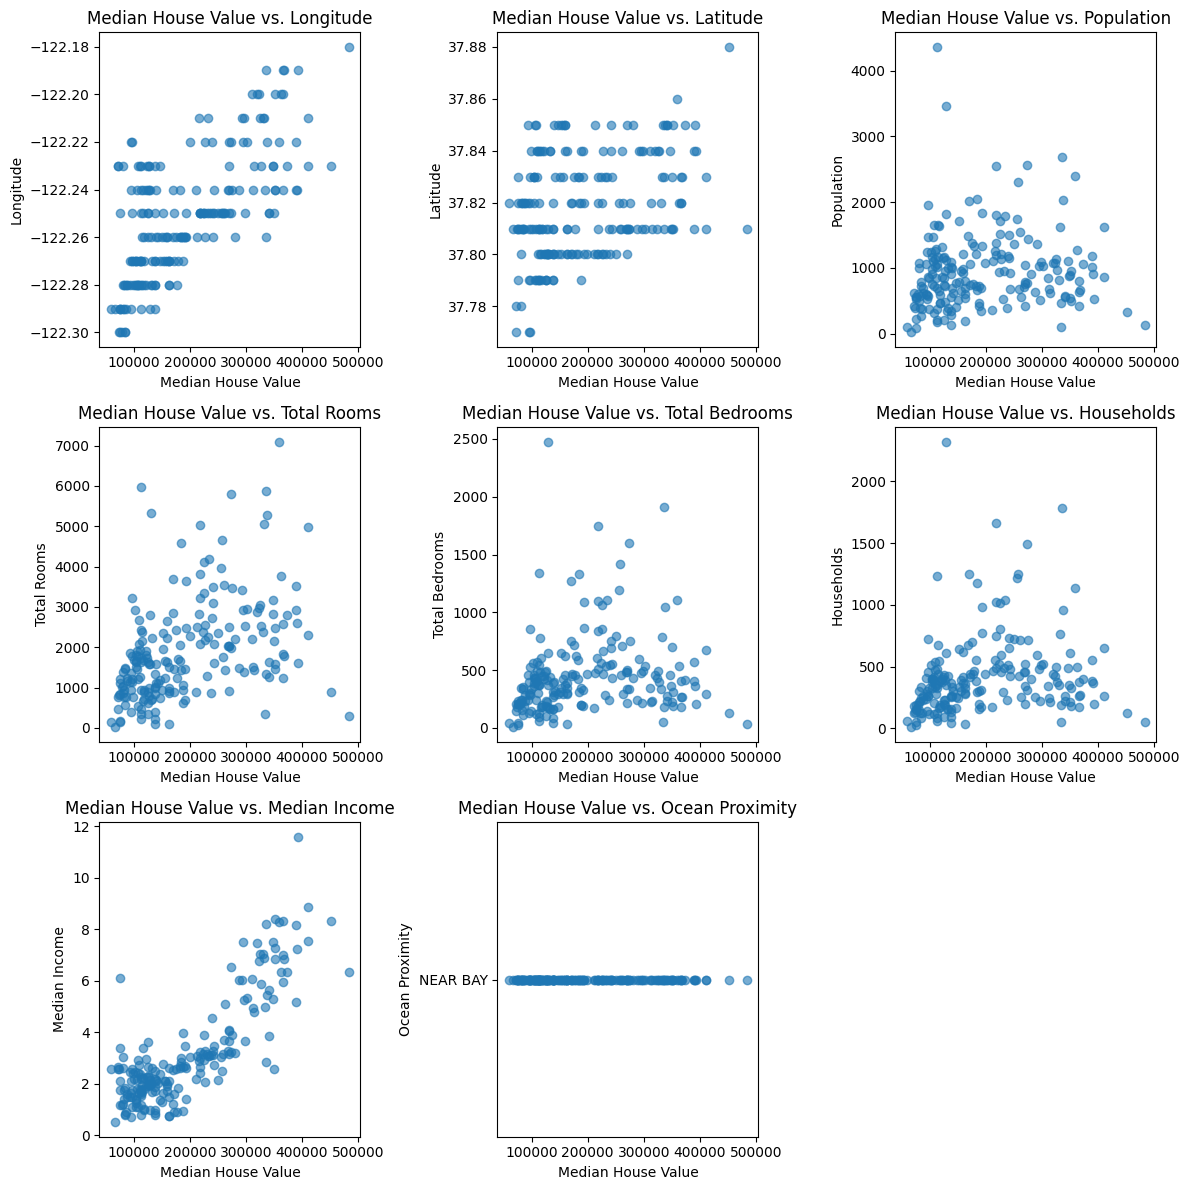

In [10]:
fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize=(12, 12))
axes = axes.flatten()
axes[0].scatter(df['median_house_value'], df['longitude'], alpha = 0.6)
axes[0].set_title('Median House Value vs. Longitude')
axes[0].set_xlabel('Median House Value')
axes[0].set_ylabel('Longitude')
axes[1].scatter(df['median_house_value'], df['latitude'], alpha = 0.6)
axes[1].set_title('Median House Value vs. Latitude')
axes[1].set_xlabel('Median House Value')
axes[1].set_ylabel('Latitude')
axes[2].scatter(df['median_house_value'], df['population'], alpha = 0.6)
axes[2].set_title('Median House Value vs. Population')
axes[2].set_xlabel('Median House Value')
axes[2].set_ylabel('Population')
axes[3].scatter(df['median_house_value'], df['total_rooms'], alpha = 0.6)
axes[3].set_title('Median House Value vs. Total Rooms')
axes[3].set_xlabel('Median House Value')
axes[3].set_ylabel('Total Rooms')
axes[4].scatter(df['median_house_value'], df['total_bedrooms'], alpha = 0.6)
axes[4].set_title('Median House Value vs. Total Bedrooms')
axes[4].set_xlabel('Median House Value')
axes[4].set_ylabel('Total Bedrooms')
axes[5].scatter(df['median_house_value'], df['households'], alpha = 0.6)
axes[5].set_title('Median House Value vs. Households')
axes[5].set_xlabel('Median House Value')
axes[5].set_ylabel('Households')
axes[6].scatter(df['median_house_value'], df['median_income'], alpha = 0.6)
axes[6].set_title('Median House Value vs. Median Income')
axes[6].set_xlabel('Median House Value')
axes[6].set_ylabel('Median Income')
axes[7].scatter(df['median_house_value'], df['ocean_proximity'], alpha = 0.6)
axes[7].set_title('Median House Value vs. Ocean Proximity')
axes[7].set_xlabel('Median House Value')
axes[7].set_ylabel('Ocean Proximity')
axes[8].set_visible(False)
plt.tight_layout()
plt.show()

After evaluating correlations between median house values and remaining 8 variables --> choosing median income to include in regression model.

## Linear regression
Split the dataset into a suitable training, validation and test set.

In [29]:
# Data is does not have spatial or temporal structure --> will structure based off training = 70, validation = 20, testing = 10
# Use df.iloc[ ... , :] where "..." is your choice of indices

# Dataset shape: 200 column, entries [0,199]
# 70% of 200 = 140
# 20% of 200 = 40
# 10% of 200 = 20
training = df.iloc[0:140,:]
validation = df.iloc[140:180,:]
testing = df.iloc[180:200,:]

# Checking data partionining is accurate
print(training.shape)
print(validation.shape)
print(testing.shape)

training.head()
validation.head()
testing.head()

training.info()
validation.info()
testing.info()


(140, 10)
(40, 10)
(20, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           140 non-null    float64
 1   latitude            140 non-null    float64
 2   housing_median_age  140 non-null    int64  
 3   total_rooms         140 non-null    int64  
 4   total_bedrooms      140 non-null    int64  
 5   population          140 non-null    int64  
 6   households          140 non-null    int64  
 7   median_income       140 non-null    float64
 8   median_house_value  140 non-null    int64  
 9   ocean_proximity     140 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 11.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 140 to 179
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitu

Create a linear regression model to predict median house value from median income using the training set. This is the advanced tutorial, so we will be building our linear regression from scratch!

## From scratch
In this notebook, we will code up linear regression using
1. Least squares
2. Gradient descent
3. Stochastic gradient descent.

We will also compare these to the sklearn and pytorch implementations.

### Preprocessing and setup
Get $(X,y)$ arrays and normalise them.

In [32]:
# assuming that training set is a pandas dataframe
# Isolates variables we are interested in running a regression on
X = training["median_income"]
y = training["median_house_value"]

X = X.iloc[:, ].values.reshape(-1, 1)      # This reshapes the array so the inputs are the correct size (N, 1)
y = y.iloc[:, ].values.reshape(-1, 1)
X.shape, y.shape

((140, 1), (140, 1))

In [37]:
from sklearn.preprocessing import StandardScaler

# Use StandardScaler to fit and transform your X data so the variables are normalised to zero mean, unit variance
scaler_X = StandardScaler()
scaler_X.fit(X)
scaler_y = StandardScaler()
scaler_y.fit(y)
X_scaled = scaler_X.transform(X)
y_scaled = scaler_y.transform(y)

print(X_scaled.shape)
print(y_scaled.shape)


(140, 1)
(140, 1)


## Least squares

Our linear regression equation is
$$ y = \beta_0 + \beta_1 x_1$$
or in the matrix formulation:
$$\mathbf{y} = \beta \mathbf{X}$$
We have $N$ data pairs of inputs and outputs, which we will index with subscript $i$, i.e., ${\mathbf{X}_i, \mathbf{y}_i}$ where $i=1, \cdots, N$. We use this linear model to make predictions for $\mathbf{y}_i$. The residual error from our linear model is the difference between a prediction and the true data, i.e., $|\mathbf{y}_i - \beta \mathbf{X_i}|$.
We want to find $\beta$ that minimises the residual sum of squares over the dataset, i.e.,
$$\arg \min_\beta \{ \sum_{i=1}^{N} (\mathbf{y}_i - \beta \mathbf{X}_i)^2 \}$$
We will call this term inside the curly brackets our Loss function, $L$.

To minimise this, take the gradient with respect to $\beta$ and set it to zero
$$\frac{dL}{d\beta}= \sum_{i=1}^N (-2 \mathbf{X}_i^T \mathbf{y}_i + 2 \beta \mathbf{X}_i^T \mathbf{X}_i) = 0 $$
$$ \hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \cdot \mathbf{X}^T \mathbf{y} $$
This is the least squares estimate.


Calculate $\beta$

In [45]:
# Calculating B from matrix formulation y = BX (closed form solution for linear regression to calculate coefficients B (or beta))

# adding a column for the intercept
# np.ones --> creates a column (or matrix) of ones with the same shape as X_scaled--> to represent B0 in matrix form we need a column of ones added to the design matrix
intercept = np.ones_like(X_scaled)
# Horzontally stacks to become a matrix --> first column corresponds to the intercept (B0) and the second column corresponds to the slope (B1)
X_mat = np.hstack((intercept, X_scaled))
X_mat.shape

# Computes B using the least squares formula
beta = np.dot(np.linalg.inv(X_mat.T @ X_mat), (X_mat.T @ y_scaled))
beta
intercept_LS = beta[0,0]
coefficient_LS = beta[1,0]

print(f"Least squares estimate (Beta): intercept {intercept_LS:.4f}, coefficient {coefficient_LS:.4f}")


Least squares estimate: intercept -0.0000, coefficient 0.8322


## Gradient descent
Instead of analytically computing the gradient, we can also use the gradient descent algorithm to estimate $\hat{\beta}$.

$$ \beta' = \beta - \alpha \nabla L $$
$\alpha$ is called the learning rate and is usually a small number. We can start with 0.01.

1. Start with a guess for $\hat{\beta}$
2. Compute $\hat{\mathbf{y}}=\hat{\beta} \mathbf{X}$.
The mean squared error loss is $L=\frac{1}{N} \sum_{i=1}^{N}{(\hat{\mathbf{y}}_i - \mathbf{y}_i)^2}=\frac{1}{N} \sum_{i=1}^{N}{(\hat{\beta} \mathbf{X}_i - \mathbf{y}_i)^2}$
3. Compute the direction of the gradient of the loss with respect to $\beta$. This is
$$ \nabla L = \frac{1}{N} \sum_{i=1}^{N} 2(\beta \mathbf{X}^T_i \mathbf{X}_i - \mathbf{X}^T_i \mathbf{y}_i) = \frac{1}{N} 2 \mathbf{X}^T \cdot (\hat{\mathbf{y}} - \mathbf{y})$$
4. Update our estimate of $\beta$ by taking the step in the direction of reducing the gradient.
5. Repeat steps 2-4. until our estimate of $\beta$ converges.

Code up gradient descent and carry out 100 iterations. Then plot the coefficient, intercept and the loss for these iterations.

In [113]:
N = X.shape[0]

# Choose your learning rate
# Alpha = 0.01 --> common default learning rate
alpha = 0.01

# store intercept and coefficients for plotting
intercepts = []
coefficients = []
losses = []


# initialise beta_hat randomly
beta_hat = np.random.rand(2, 1)

#Main gradient descent loop
for t in range(1000):
    # Making predictions
    y_hat = X_mat @ beta_hat
    # compute direction of gradient --> gradient of MSE loss with respect to B
    d_L =  2*np.dot(X_mat.T, y_hat - y_scaled)/N

    # update --> learning step, subtract the gradient scaled by the learning rate, every step makes B better
    beta_hat = beta_hat - alpha * d_L

    # store
    intercepts.append(beta_hat[0,0])
    coefficients.append(beta_hat[1,0])
    losses.append(np.sum((y_hat - y_scaled)**2))

print(beta_hat)

[[2.49472070e-10]
 [8.32224992e-01]]


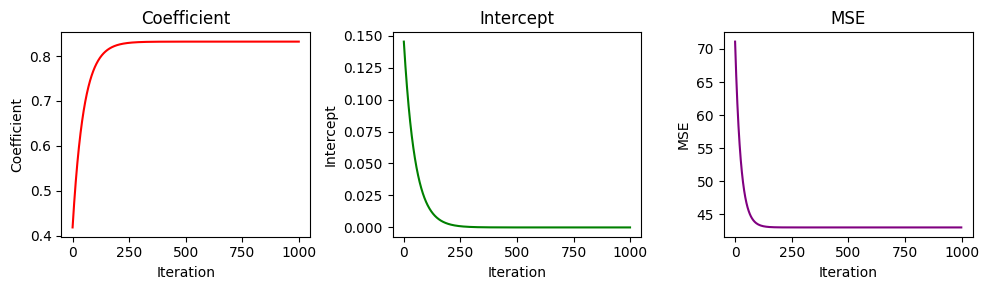

In [114]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].plot(coefficients, color = 'red')
axs[0].set_title("Coefficient")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Coefficient")

axs[1].plot(intercepts, color = 'green')
axs[1].set_title("Intercept")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Intercept")

axs[2].plot(losses, color = 'purple')
axs[2].set_title("MSE")
axs[2].set_xlabel("Iteration")
axs[2].set_ylabel("MSE")

plt.tight_layout()
plt.show()

Try different values for $\alpha$. What happens?

At $\alpha$ = 0.001 --> plots were all straight lines

At $\alpha$ = 0.5 --> plots were very wiggly

Changed iterations from range(100) to range(1000) --> models converged (the graphs bottomed out rather than being straight lines with a slight curve)

## Stochastic gradient descent

With a relatively small dataset, we can estimate the gradient over the entire dataset. But when we have larger datasets, this becomes computationally expensive. Stochatic gradient descent is a stochastic approximation of gradient descent optimization. It replaces the true gradient calculated from the entire data set with an estimate of it, calculated from a randomly selected subset of the data.

Use a batch size of 32 and carry out gradient descent on one batch at a time. Iterate through the data 100 times (epochs).

In [93]:
batch_size = 32
N = X_mat.shape[0]
data_inds = np.arange(N)
np.random.shuffle(data_inds)
# Check the data are shuffled
data_inds

array([ 31,  20,   9, 131,  11,   3,  66,  90,  27,   5, 123,  58, 104,
       109,  78, 128, 129,  33,  39, 134,  32,  94,  19,  60, 116, 137,
        34,  38,  69, 133,  64, 117, 113,  48,  99,  63,  46,  47,  41,
        61,  85,  81,  57,  92, 127, 119,  14,  83, 106,  24,  30, 125,
        95,  59,  65,  74,  43,   6,   0,  13, 130,  23, 118,  29,  71,
       115, 135, 124,  52,  50,  53, 107,  62,  35, 101, 139,  67, 114,
       121,  36,  82,  91, 122,  10,  55,  18,  77,  96,  80,  42,  16,
        93,  86,  73,  28,  84,   8,  89,  40,   7, 120,  56,  17,  97,
        76,  51,  21, 132, 110,  70,   2,  68, 105, 136, 138,  98,  75,
        88,  25,  49, 100,  12, 111, 112, 126,  79,  54,   4,  22,   1,
        44, 108,  87,  45,  26, 102,  15, 103,  37,  72])

In [108]:
# Now build your loop over 100 epochs and an inner over the batches

alpha = 0.01

# store intercept and coefficients for plotting
intercepts = []
coefficients = []
losses = []

# initialise beta_hat randomly
beta_hat2 = np.random.rand(2, 1)

for t in range(100):
    np.random.shuffle(data_inds)
    X_shuffled = X_mat[data_inds]
    y_shuffled = y_scaled[data_inds]
    for b in range(N//batch_size):
        X_batch = X_shuffled[b*batch_size:(b+1)*batch_size]
        y_batch = y_shuffled[b*batch_size:(b+1)*batch_size]

        y_hat = X_batch @ beta_hat

        # compute direction of gradient
        d_L =  2*np.dot(X_batch.T, y_hat - y_batch)/N

        # update
        beta_hat2 = beta_hat2 - alpha * d_L

        # store
        intercepts.append(beta_hat2[0,0])
        coefficients.append(beta_hat2[1,0])
        losses.append(np.sum((y_hat - y_batch)**2))


print(beta_hat2)

[[0.63700147]
 [0.1906869 ]]


Text(0.5, 1.0, 'MSE')

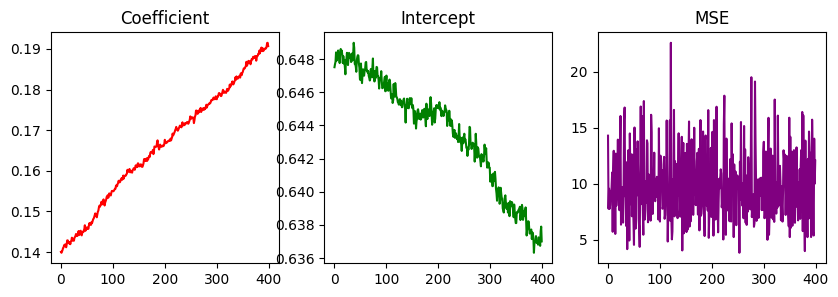

In [109]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].plot(coefficients, color= 'red')
axs[0].set_title("Coefficient")

axs[1].plot(intercepts, color= 'green')
axs[1].set_title("Intercept")

axs[2].plot(losses, color = 'purple')
axs[2].set_title("MSE")

## Scikit-learn solution
Compare your results to the sklearn solution `sklearn.linear_model.LinearRegression()`. See https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html.

In [105]:
from sklearn import linear_model

# Create your linear regression model and print the coefficients and intercept.
reg = linear_model.LinearRegression()
# Fit(train) the model with the scaled intercepts and coefficients
reg.fit(X_scaled, y_scaled)

#print out the coefficients of the model --> extract the slope (coefficient)
coefficient_SK = reg.coef_[0,0]
#extract the intercept
intercept_SK = reg.intercept_[0]

#printing the results (:.4f --> prints numbers to 4 decimal places)
print(f"sklearn estimate: intercept {intercept_SK:.4f}, coefficient {coefficient_SK:.4f}")

sklearn estimate: intercept -0.0000, coefficient 0.8322


Do you get the same results?

In [115]:
print("Closed form:", intercept_LS, coefficient_LS)
print("Gradient descent:", beta_hat.ravel())
print("Stochastic Gradient descent:", beta_hat2.ravel())
print("Sklearn:", intercept_SK, coefficient_SK)


Closed form: -2.8199743915129075e-16 0.8322249925742568
Gradient descent: [2.49472070e-10 8.32224992e-01]
Stochastic Gradient descent: [0.63700147 0.1906869 ]
Sklearn: -2.4933896085649603e-16 0.8322249925742562


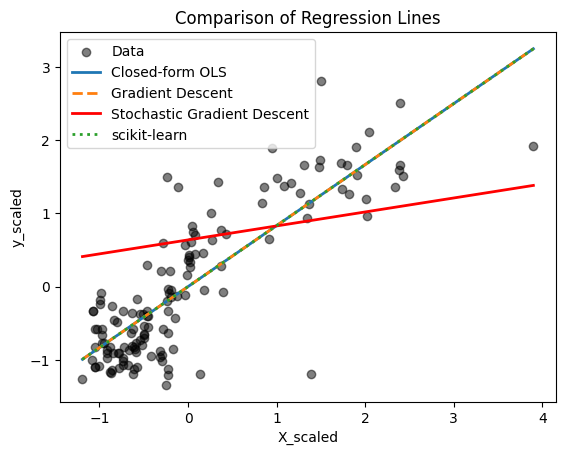

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range of x-values for plotting the fitted lines
x_line = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)

# Predict using each model
y_ls_line = intercept_LS + coefficient_LS * x_line
y_gd_line = beta_hat[0,0] + beta_hat[1,0] * x_line
y_sgd_line = beta_hat2[0,0] + beta_hat2[1,0] * x_line
y_sk_line = intercept_SK + coefficient_SK * x_line

# Plot the data
plt.scatter(X_scaled, y_scaled, color='black', alpha=0.5, label='Data')

# Plot the three regression lines
plt.plot(x_line, y_ls_line, label='Closed-form OLS', linewidth=2)
plt.plot(x_line, y_gd_line, label='Gradient Descent', linestyle='--', linewidth=2)
plt.plot(x_line, y_sgd_line, label = 'Stochastic Gradient Descent', linewidth =2, color = 'red')
plt.plot(x_line, y_sk_line, label='scikit-learn', linestyle=':', linewidth=2)

plt.xlabel("X_scaled")
plt.ylabel("y_scaled")
plt.title("Comparison of Regression Lines")
plt.legend()
plt.show()


## Pytorch solution
Can you also use a pytorch implementation of linear regression? Explore different learning rates and see how quickly your parameters converge
          


In [ ]:
import torch

# Create a linear layer (1D-> 1D) using torch.nn.Linear(...)
linear_layer =
# For optimiser, look at the docs for torch.optim.SGD()
optimiser =
# For the loss function, look at the docs for torch.nn.MSE()
loss_function =



linear_layer = torch.nn.Linear(in_features=1, out_features=1)
optimiser = torch.optim.SGD(params = linear_layer.parameters(), lr=0.1)
loss_function = torch.nn.MSELoss()


for p in linear_layer.parameters():
    print(p)

X_torch = torch.tensor(X_scaled, dtype=torch.float32)
y_torch = torch.tensor(y_scaled, dtype=torch.float32)


# Store parameters for plotting
coefficients = []
intercepts = []
losses = []
for iteration in range(100):
    optimiser.zero_grad()
    pred = linear_layer(X_torch)
    loss = loss_function(pred, y_torch)
    loss.backward()

    for p, param in enumerate(linear_layer.parameters()):
        if p == 0:
            coefficients.append(param.item())
        elif p==1:
            intercepts.append(param.item())

    losses.append(loss.item())

    # Update optimiser
    optimiser.step()

  for p in linear_layer.parameters():
    print(p)


  fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].plot(coefficients)
axs[0].set_title("Coefficient")

axs[1].plot(intercepts)
axs[1].set_title("Intercept")

axs[2].plot(losses)
axs[2].set_title("MSE")


Check the parameters of your neural network. There should be two: one for the coefficient/weight and one for the intercept/bias.

In [ ]:
for p in linear_layer.parameters():
    print(p)

In [ ]:
# Convert your np arrays into torch tensors using torch.tensor(...)
X_torch = torch.tensor(
y_torch = torch.tensor(

In [ ]:
# Store parameters for plotting
coefficients = []
intercepts = []
losses = []

for iteration in range(100):
    optimiser.zero_grad()
    pred = linear_layer(X_torch)
    loss = loss_function(pred, y_torch)
    loss.backward()

    for p, param in enumerate(linear_layer.parameters()):
        if p==0:
            coefficients.append(param.item())
        elif p==1:
            intercepts.append(param.item())
    losses.append(loss.item())

    # Update optimiser
    optimiser.step()


Check your parameters after training - they should have converged to the same values as the least squares estimates.

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].plot(coefficients)
axs[0].set_title("Coefficient")

axs[1].plot(intercepts)
axs[1].set_title("Intercept")

axs[2].plot(losses)
axs[2].set_title("MSE")